Virtual Acoustics and Immersive Audio Workshop - CCRMA Stanford University  
21.07.25 - Orchisama Das, Gloria Dal Santo
  
### L01: Acoustic Parameters 

In this assignment we will 
- Compute the Energy Decay Curve (EDC) and Energy Decay Relief (EDR) of a given measured RIR 
- Estimate the reverberation time (T60) from the EDC 
- Compute the Normalized Echo Density



In [1]:
# --- Imports ---
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import os

from pathlib import Path

from utils import (
    audioread, 
    filterbank, 
    find_onset)
from room_acoustics.analysis import (
    compute_edc, 
    estimate_rt60,
    compute_edr, 
    normalized_echo_density)
from room_acoustics.plot import (
    plot_time_domain)

#### 1. Load Impulse Response

We will be using two impulse responses present in the `data/.` folder: `s3_r4_o.wav` and `P_103_Speaker.wav`.  
- 1.1 Load the signals and their sampling frequency using the provided `audioread` function.  
- 1.2 Plot their time domain response using the provided `plot_time_domain` function.  

In [2]:
# --- Load Impulse Responses ---
rir_path = "/Users/k/ccrma/VAIAWorkshop25Public/data/s3_r4_o.wav"
#### WRITE YOUR CODE ####
rir_1, fs_1 = audioread(rir_path)
# Use the `ipd` library to for audio playback
ipd.display(ipd.Audio(rir_1, rate=fs_1))

rir_path2 = "/Users/k/ccrma/VAIAWorkshop25Public/data/s3_r4_o.wav"
#### WRITE YOUR CODE ####
rir_2, fs_2 = audioread(rir_path)
ipd.display(ipd.Audio(rir_2, rate=fs_2))

In [3]:
## TEST:

a_b = np.array([100, 90, 80, 70, 60, 50, 40, 30, 20, 10])
a =  np.array([10000, 5000, 1000, 100, 10, 1])
from room_acoustics.analysis import schroeder_backward_int, compute_edc
# Test the schroeder_backward_int function
# print(schroeder_backward_int(a, subtract_noise=True, noise_level=5))


In [4]:
edc_db = arr = np.linspace(0, -100, 50)
valid_range = (edc_db >= -65) & (edc_db <= -5)
selected_range = edc_db[valid_range]
print(valid_range)
print(selected_range)

[False False False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False False
 False False False False False False False False False False False False
 False False]
[ -6.12244898  -8.16326531 -10.20408163 -12.24489796 -14.28571429
 -16.32653061 -18.36734694 -20.40816327 -22.44897959 -24.48979592
 -26.53061224 -28.57142857 -30.6122449  -32.65306122 -34.69387755
 -36.73469388 -38.7755102  -40.81632653 -42.85714286 -44.89795918
 -46.93877551 -48.97959184 -51.02040816 -53.06122449 -55.10204082
 -57.14285714 -59.18367347 -61.2244898  -63.26530612]


#### 2 Compute the EDC and Estimate RT 
For `s3_r4_o.wav` do the following: 
- 2.1 Complete the functions in `room_acoustics.analysis` for the computation of the EDC via Schroeder backward integration (i.e. `schroeder_backward_int` and `compute_edc`).  
- 2.2 Define a dB range you will use to estimate the RT.  
- 2.3 Use `scipy.stats.linregress`to estimate the RT via least squares regression. You can do this in the function called `estimate_rt60`. 
- 2.4 Plot the EDC and the linear fit. 


(array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       9.87531051e-14, 6.58354034e-14, 3.29177017e-14], shape=(192000,)), array([0.10792715]))
Input signal: [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.96046448e-08
 0.00000000e+00 0.00000000e+00]
EDC after backward integration: [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.29177017e-14
 0.00000000e+00 0.00000000e+00]
EDC in dB pre normalize: [   0.            0.            0.         ... -134.82570495 -150.
 -150.        ]
EDC in dB: [   0.            0.            0.         ... -134.82570495 -150.
 -150.        ]
EDC (dB): [   0.            0.            0.         ... -134.82570495 -150.
 -150.        ]
edc_db: [   0.            0.            0.         ... -134.82570495 -150.
 -150.        ]
Valid range: [False False False ... False False False]
Selected range: [ -5.00109454  -5.00210938  -5.00286805 ... -64.99957163 -64.99966023
 -64.99984105]
Time vector: [0.22731369 0.22733452 0.22735536 ... 2.51682567 

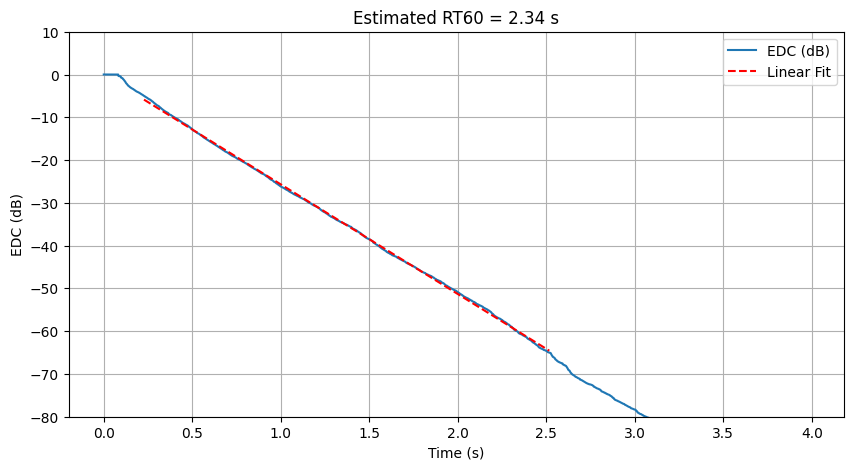

Estimated RT60: 2.34 seconds


In [5]:
# --- Compute EDC and Estimate RT60 ---

### WRITE YOUR CODE HERE ###
# compute the EDC for the first impulse response
# construct the time vector
# define the decay start and end dB levels
print(schroeder_backward_int(rir_1))
edc_db = compute_edc(rir_1, energy_norm=True, fs=fs_1)
print(f"EDC (dB): {edc_db}")
time = np.linspace(0, len(edc_db) / fs_1, len(edc_db))
decay_start_db = -5  # dB level where decay starts
decay_end_db = -65  # dB level where decay ends
# Estimate the T60 using the defined decay levels
rt60, slope, intercept, valid_range = estimate_rt60(edc_db, time, decay_start_db, decay_end_db)

print(f"RT60: {rt60:.2f} seconds")
print(f"Slope: {slope:.2f}, Intercept: {intercept:.2f}")
print(f"Valid range: {valid_range}")

plt.figure(figsize=(10, 5))
plt.plot(time, edc_db, label="EDC (dB)")
plt.plot(time[valid_range], slope * time[valid_range] + intercept, 'r--', label="Linear Fit")
plt.xlabel("Time (s)")
plt.ylabel("EDC (dB)")
plt.title(f"Estimated RT60 = {rt60:.2f} s")
plt.legend()
plt.grid(True)
plt.ylim(-80, 10)
plt.show()
print(f"Estimated RT60: {rt60:.2f} seconds")

#### 3 Compute the Frequency Dependent EDC and Estimate RT 
Oftentimes we are more interested in the frequency dependent decay. 
- 3.1 Filter the RIR using the given filterbank function 
- 3.2 Repeat the steps in 2 for all frequency bands 
- 3.3 Plot the RT curve as a function of the frequency

Filterbank output shape: (10, 192000)
[[-1.36346224e-14 -1.34551371e-14 -1.32769399e-14 ... -1.41698754e-14
  -1.39919938e-14 -1.38126681e-14]
 [ 2.03540888e-19  1.96023753e-19  1.90241341e-19 ...  2.21601042e-19
   2.19824814e-19  2.08031574e-19]
 [-4.33680869e-22  2.16840434e-21  8.67361738e-22 ...  4.29163360e-21
   1.17455235e-22  2.87765327e-21]
 ...
 [ 3.75856753e-21  2.89120579e-22  1.44560290e-21 ... -4.23375301e-22
   3.17298542e-21  1.43607378e-21]
 [-2.16840434e-22 -1.62630326e-21 -1.66244333e-21 ... -2.03664661e-21
  -2.46333063e-21 -1.38197396e-21]
 [ 6.14381231e-22  5.78241159e-22 -2.31296463e-21 ... -2.85754506e-22
   8.80720153e-22 -3.21471062e-21]]
Frequency bands: [   31.5    63.    125.    250.    500.   1000.   2000.   4000.   8000.
 16000. ]
Input signal: [-1.36346224e-14 -1.34551371e-14 -1.32769399e-14 ... -6.48093133e-15
 -6.68165046e-15 -6.88135513e-15]
EDC after backward integration: [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.31396306e-21
 9.02099580e-

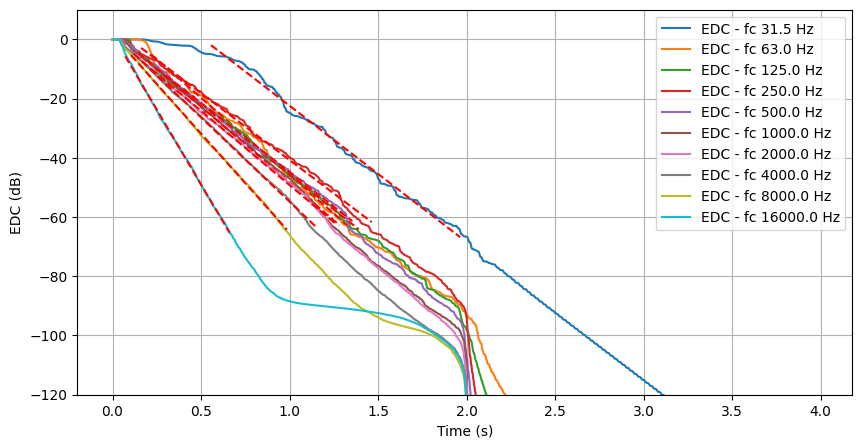

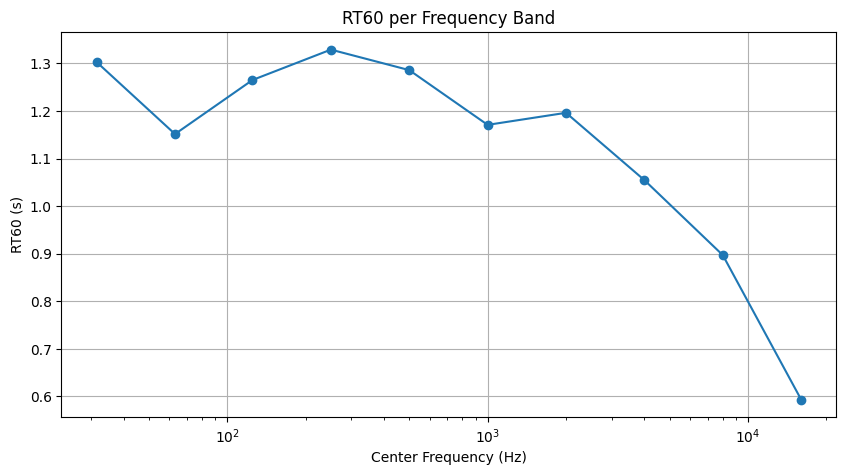

In [12]:
# --- Compute the EDC per frequency band and Estimate RT60 ---

#### WRITE YOUR CODE HERE ####
# Use the filterbank function to compute EDCs for the first impulse response
# you can use a fractional octave filterbank between 20 an 20000 Hz
f_min = 20
f_max = 20000
fs = fs_1
compensate_fbnk_energy = True
n_fractions = 1
filterout, center_freqs = filterbank(rir_1, n_fractions, f_min=f_min, f_max=f_max, sample_rate=fs, compensate_energy=compensate_fbnk_energy)
print(f"Filterbank output shape: {filterout.shape}")
print(filterout)
print(f"Frequency bands: {bands}")

plt.figure(figsize=(10, 5))
rt60_curve = np.zeros(len(center_freqs))
for i_band in range(len(center_freqs)):

    #### WRITE YOUR CODE HERE ####
    edc_db_band = compute_edc(filterout[i_band], energy_norm=True, fs=fs)
    print(f"EDC (dB): {edc_db_band}")
    time = np.linspace(0, len(edc_db_band) / fs, len(edc_db_band))
    decay_start_db = -5  # dB level where decay starts
    decay_end_db = -65  # dB level where decay ends
    # Estimate the T60 using the defined decay levels
    rt60, slope, intercept, valid_range = estimate_rt60(edc_db_band, time, decay_start_db, decay_end_db)
    # Compute EDC for the current frequency band
    # Construct the time vector for this band
    # Estimate RT60 using the defined decay levels

    rt60_curve[i_band] = rt60
    plt.plot(time, edc_db_band, label=f"EDC - fc {center_freqs[i_band]} Hz")
    plt.plot(time[valid_range], slope * time[valid_range] + intercept, 'r--')

plt.xlabel("Time (s)")
plt.ylabel("EDC (dB)")
plt.legend()
plt.grid(True)
plt.ylim(-120, 10)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(center_freqs, rt60_curve, marker='o')
plt.ylabel("RT60 (s)")
plt.xlabel("Center Frequency (Hz)")
plt.xscale('log')
plt.title("RT60 per Frequency Band")
plt.grid(True)
plt.show()


#### 4 Compensate the influence of background noise 
The previous RIR was very clean, it had a high signal to noise ratio which allowed us to 
estimate the reverberation time directly from a 60 dB drop in energy.  
In this section you will work with a different RIR, which has much lower SNR.  
- 4.1 Plot the EDC and the learn fit on starting and ending decay level of -5, -65 dB. What do you observe? 
- 4.2 Estimate the rt60 on a shorter dB range. Try [-5, -25] or [-5, -35] for example. 
- 4.3 Try to reduce the effect of the background noise by subtracting it from the EDC and then run the rt60 estimation. You can estimate the energy of the EDC from the last 50 ms of the RIR, for example. Note that the noise has to be subtracted from the squared impulse response during backward integration. 

Input signal: [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.96046448e-08
 0.00000000e+00 0.00000000e+00]
EDC after backward integration: [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.29177017e-14
 0.00000000e+00 0.00000000e+00]
EDC in dB pre normalize: [   0.            0.            0.         ... -134.82570495 -150.
 -150.        ]
EDC in dB: [   0.            0.            0.         ... -134.82570495 -150.
 -150.        ]


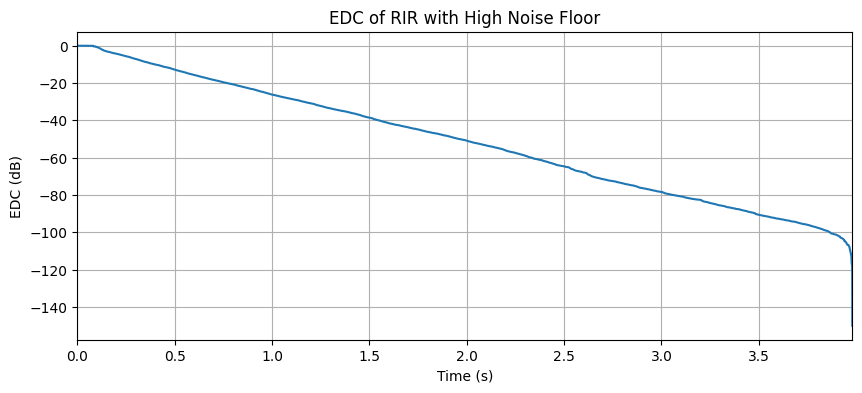

edc_db: [   0.            0.            0.         ... -134.82570495 -150.
 -150.        ]
Valid range: [False False False ... False False False]
Selected range: [ -5.00109454  -5.00210938  -5.00286805 ... -64.99957163 -64.99966023
 -64.99984105]
Time vector: [0.2273125  0.22733333 0.22735417 ... 2.5168125  2.51683333 2.51685417]
Time vector length: 109899
EDC length: 109899
Linear regression result: LinregressResult(slope=np.float64(-25.63683786231339), intercept=np.float64(-0.04549870625395869), rvalue=np.float64(-0.9998074818893226), pvalue=np.float64(0.0), stderr=np.float64(0.0015176968953572259), intercept_stderr=np.float64(0.0023114150236727806))
Slope: -25.63683786231339, Intercept: -0.04549870625395869


NameError: name 'edc_cleaner' is not defined

In [8]:
# --- Load RIR with High Noise Floor ---
edc_20dB = compute_edc(rir_2, energy_norm=True)
time = np.arange(len(edc_20dB)) / fs_2

plot_time_domain(edc_20dB, fs_2, title='EDC of RIR with High Noise Floor', xlabel='Time (s)', ylabel='EDC (dB)')

# --- Estimate RT60 from Shorter Interval and  ---
### WRITE YOUR CODE HERE ###
# Define decay start and end dB levels - try different values 
rt60_20dB, slope_20dB, intercept_20dB, valid_range_20dB = estimate_rt60(edc_20dB, time, decay_start_db, decay_end_db)

# --- Subtract Noise Floor and Estimate RT60 ---

### WRITE YOUR CODE HERE ###
# Estimate the noise level from the last 50 ms of the RIR
# Compute the EDC with noise floor subtracted
# Recompute the time vector for the cleaned EDC

rt60_cleaner, slope_cleaner, intercept_cleaner, valid_range_cleaner = estimate_rt60(edc_cleaner, time, decay_start_db, decay_end_db)

plt.figure(figsize=(10, 5))
plt.plot(time, edc_20dB, label="EDC (dB)")
plt.plot(time, edc_cleaner, label="EDC - noise floor (dB)")
plt.plot(time[valid_range_20dB], slope_20dB * time[valid_range_20dB] + intercept_20dB, 'r--', label=f"Linear Fit - RT60 {rt60_20dB:.2f} s")
plt.plot(time[valid_range_cleaner], slope_cleaner * time[valid_range_cleaner] + intercept_cleaner, 'g--', label=f"Linear Fit - RT60 {rt60_cleaner:.2f} s")
plt.xlabel("Time (s)")
plt.ylabel("EDC (dB)")
plt.legend()
plt.grid(True)
plt.ylim(-80, 10)
plt.show()
print(f"RT60 (20dB range): {rt60_20dB:.2f} s, RT60 (noise subtracted): {rt60_cleaner:.2f} s")


#### 5 Compute the Energy Decay Relief (EDR)
If we are interested in an even finer frequency resolution, then the EDR is our way to go. 
- 5.1 Similarly to `compute_edc` complete the `compute_edr` function in `room_acoustics.analysis`. Note: you might have to modify the Schroeder backward integration function to accommodate for 2D vectors since we'll be working with STFT instead of impulse response now. To compute the spectrogram you can use `scipy.signal.spectrogram` function. 
- 5.2 Play with the `nperseg` parameter in `scipy.signal.spectrogram` to change the frequency-time resolutions. 

In [ ]:
# --- Compute the Energy Decay Relief ---
edr = compute_edr(rir_1)

# --- Plot the Energy Decay Relief ---
# This section is already coded for you
n_freq_bands, n_time_samples = edr.shape
    
# Create time and frequency axes
time = np.arange(n_time_samples) / fs_1
freq_bands = np.arange(n_freq_bands) * (fs_1 / 2 / n_freq_bands)
T, F = np.meshgrid(time, freq_bands)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the waterfall and -10 dB contours 
surf = ax.plot_surface(T, F, edr, cmap='viridis', alpha=0.8, 
                    linewidth=0, antialiased=True)
contours = ax.contour(T, F, edr, levels=10, colors='black', alpha=0.3, linewidths=0.5)

# Set labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz))')
ax.set_zlabel('EDR (dB)')
ax.set_title('Energy Decay Relief (EDR)')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='EDR (dB)')
ax.view_init(elev=20, azim=45) # for better visibility

plt.tight_layout()
plt.show()

#### 6 Compute the Normalized Echo Density (NED) profile 
- 6.1 Complete the `normalized_echo_density` function in `room_acoustics.analysis`. 
- 6.2 Compute the NED for the two RIRs analyzed above, plus the `data.rir_0.wav` file. Note: It is recommended to remove the silence before the onset, in order to avoid noisy values at the beginning of the NED. To do so we use the `room_acoustics.analysis.find_onset` function. 
- 6.3 Plot the NED. How are they different from each other?
Try with different parameter configurations (one that will show you interpretable results are `window_length_ms = 100` and `use_local_avg=True`)


In [ ]:
# --- Compute the Echo Density Profile ---
ned_1 = normalized_echo_density(
    rir_1[max(find_onset(rir_1).item(), 0):], 
    fs_1,
    window_length_ms=100, 
    use_local_avg=True
)
ned_2 = normalized_echo_density(
    rir_2[max(find_onset(rir_2).item(),0):], 
    fs_2,
    window_length_ms=100, 
    use_local_avg=True
)

# Load the third RIR and compute its NED
rir_path = Path('..') / 'data' / 'rir_0.wav'
rir_3, fs_3 = audioread(str(rir_path))
ned_3 = normalized_echo_density(
    rir_3[max(find_onset(rir_3).item(), 0):], 
    fs_3,
    window_length_ms=100, 
    use_local_avg=True
)

plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(ned_1))/fs_1, ned_1, label="RIR 1")
plt.plot(np.arange(len(ned_2))/fs_2, ned_2, label="RIR 2")
plt.plot(np.arange(len(ned_3))/fs_3, ned_3, label="RIR 3")
plt.xlabel("Time (s)")
plt.ylabel("NED")
plt.xlim(0, 1)
plt.ylim(0, 1.5)
plt.title("Normalised Echo Density Profile")
plt.legend()
plt.grid(True)
plt.show()
